In [1]:
from deepface import DeepFace

2023-07-03 03:30:03.972233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 03:30:04.049113: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 03:30:04.052521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 03:30:05.930850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
image1 = '/opt/ml/project/celeb_dataset/input/Dami/Image_2.jpg'
image2 = '/opt/ml/project/celeb_dataset/test/Dami/Image_3.jpg'
image3 = '/opt/ml/project/celeb_dataset/test/Kimjiwon/Image_1.jpg'
image4 = '/opt/ml/project/celeb_dataset/test/Suzy/Image_3.jpg'
image5 = '/opt/ml/project/celeb_dataset/test/Taeri/Image_1.jpg' # 웃는 사진

## Comparing Faces
두 이미지를 비교하여 동일한 사람의 얼굴이 포함되어 있는지 확인

In [20]:
# 기본 설정 된 VGG-Face로 김다미 사진 비교(image1, image2)

DeepFace.verify(img1_path = image1,  
                img2_path = image2) 

{'verified': False,
 'distance': 0.43198605358972486,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 128, 'y': 88, 'w': 160, 'h': 160},
  'img2': {'x': 135, 'y': 115, 'w': 230, 'h': 230}},
 'time': 1.83}

In [4]:
# 기본 설정 된 VGG-Face로 김다미, 김지원 사진 비교(image1, image3)

DeepFace.verify(img1_path = image1,   
                 img2_path = image3) 

{'verified': False,
 'distance': 0.563777320183821,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 359, 'y': 274, 'w': 398, 'h': 398},
  'img2': {'x': 180, 'y': 212, 'w': 242, 'h': 242}},
 'time': 2.34}

## Embeddings
임베딩은 얼굴 이미지를 나타내는 다차원 벡터입니다.

In [21]:
# 김다미 사진 embedding 찾기
# embedding에서 facial_area : 이미지에서 얼굴의 위치가 포함된 값

embeddings = DeepFace.represent(img_path = image1) 
embeddings

[{'embedding': [0.0037676047068089247,
   0.025248048827052116,
   0.011799459345638752,
   -0.0013777390122413635,
   0.022375809028744698,
   0.018747294321656227,
   0.013138004578649998,
   0.008732009679079056,
   0.021098310127854347,
   0.014836849644780159,
   0.011166444979608059,
   0.004683970473706722,
   0.009219988249242306,
   0.00829354114830494,
   0.01640947349369526,
   0.001968033378943801,
   0.02196291834115982,
   0.014898869208991528,
   0.018348149955272675,
   0.02655189298093319,
   0.01616290584206581,
   0.01538493949919939,
   0.0038094562478363514,
   0.009136909618973732,
   0.017468852922320366,
   0.010313969105482101,
   0.01035415381193161,
   0.016434233635663986,
   0.014483019709587097,
   0.008140320889651775,
   0.015662923455238342,
   0.01565525494515896,
   0.009151481091976166,
   0.018658313900232315,
   0.0010102358646690845,
   0.010541323572397232,
   0.018203556537628174,
   0.002054507378488779,
   0.00704889977350831,
   0.01640047132

## image1와 얼굴을 감지한 영역 주위에 사각형을 표시

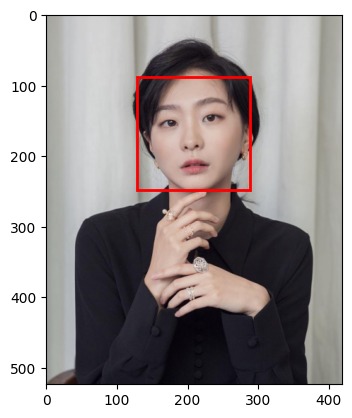

In [22]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from PIL import Image 

im = Image. open (image1) 
fig, ax = plt.subplots() 

# 이미지 표시
ax.imshow(im) 

# 얼굴 주위에 사각형 그리기
face_coord = embeddings[ 0 ][ 'facial_area' ] 
rect = patches.Rectangle((face_coord[ 'x' ], face_coord[ 'y' ]), 
                         face_coord[ 'w' ], face_coord[ 'h' ], 
                         linewidth =2 , 
                         edgecolor = 'r' , 
                         facecolor = 'none' ) 

# 패치를 축에 추가
ax.add_patch(rect)

## Finding a Face from a Folder

In [23]:
# find() 함수는 Pandas DataFrames 목록을 반환하므로 첫 번째 DataFrame을 검색하려면 0 인덱스를 사용해야 합니다.
# 데이터 프레임은 VGG-Face_cosine을 기준으로 정렬됩니다.(값이 작을수록 일치 항목이 더 가깝습니다)

DeepFace.find(img_path = image1,    # the image to compare against
              db_path = "Faces",    # folder containing all the images
              enforce_detection = False)[0]

Finding representations: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


Representations stored in Faces/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  10.225355386734009  seconds


,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,Faces/Kimjiwon_1.jpg,128,88,160,160,0.059494
1,Faces/Suzy_3.jpg,128,88,160,160,0.239535
2,Faces/Suzy_1.jpg,128,88,160,160,0.389949
3,Faces/Suzy_1.jpg,128,88,160,160,0.392242


## Analyzing Faces
얼굴을 비교하고 얼굴 폴더에서 얼굴을 찾는 것 외에도 DeepFace를 사용하면 연령, 성별, 감정 및 인종과 같은 얼굴의 다양한 특징을 분석할 수 있습니다.

In [10]:
# image4 = '/opt/ml/project/celeb_dataset/test/Suzy/Image_3.jpg'

DeepFace.analyze(img_path = image4, 
                 actions = ["age", "gender", "emotion", "race"])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /opt/ml/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 26.1MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /opt/ml/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:26<00:00, 20.5MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /opt/ml/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:25<00:00, 21.2MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /opt/ml/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:26<00:00, 20.5MB/s] 
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]   


[{'age': 30,
  'region': {'x': 263, 'y': 245, 'w': 73, 'h': 73},
  'gender': {'Woman': 20.799507200717926, 'Man': 79.2004942893982},
  'dominant_gender': 'Man',
  'emotion': {'angry': 0.0014094241123530082,
   'disgust': 4.932124753054268e-06,
   'fear': 67.57414937019348,
   'happy': 5.340814901444446e-07,
   'sad': 0.5922796204686165,
   'surprise': 0.0637493038084358,
   'neutral': 31.76840841770172},
  'dominant_emotion': 'fear',
  'race': {'asian': 0.06760199724373205,
   'indian': 0.2707992143287786,
   'black': 0.02242441975759609,
   'white': 82.89989727138861,
   'middle eastern': 12.820269931570884,
   'latino hispanic': 3.91900898033434},
  'dominant_race': 'white'}]

In [11]:
# image5 = '/opt/ml/project/celeb_dataset/test/Taeri/Image_1.jpg' # 웃는 사진

DeepFace.analyze(img_path = image5, 
                 actions = ["age", "gender", "emotion", "race"])

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]   


[{'age': 25,
  'region': {'x': 475, 'y': 273, 'w': 448, 'h': 448},
  'gender': {'Woman': 97.95071482658386, 'Man': 2.049289084970951},
  'dominant_gender': 'Woman',
  'emotion': {'angry': 2.034333292100232e-09,
   'disgust': 4.1036846364001394e-17,
   'fear': 1.649836083722489e-10,
   'happy': 96.8286395072937,
   'sad': 9.088124919287566e-07,
   'surprise': 4.25608561727131e-06,
   'neutral': 3.171360120177269},
  'dominant_emotion': 'happy',
  'race': {'asian': 99.99988675116818,
   'indian': 1.1623912836771297e-05,
   'black': 2.1497973954247229e-10,
   'white': 5.669510070726585e-05,
   'middle eastern': 2.449096072037853e-08,
   'latino hispanic': 4.3497842944520595e-05},
  'dominant_race': 'asian'}]

# models, backends 선택

#### model : VGG-Face, detector_backend : opencv, 김다미 사진(image1, image2) -> False 

#### model : VGG-Face, detector_backend : retinaface, 김다미 사진(image1, image2) -> True


In [68]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "ArcFace"]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe','yolov8']


In [62]:
# backend를 기본값 opencv, model을 여러 모델로 실험
# 결과는 그대로 False -> verify는 backend의 성능이 더 중요하다는 것을 알 수 있다.

DeepFace.verify(image1, 
                image2, 
                model_name = models[5],  
                detector_backend = backends[0])

{'verified': False,
 'distance': 0.9478757402187922,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 128, 'y': 88, 'w': 160, 'h': 160},
  'img2': {'x': 135, 'y': 115, 'w': 230, 'h': 230}},
 'time': 1.08}

In [63]:
DeepFace.verify(image1, 
                image2, 
                model_name = models[0],  
                detector_backend = backends[4])

{'verified': True,
 'distance': 0.2069280923795329,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 147, 'y': 84, 'w': 124, 'h': 165},
  'img2': {'x': 164, 'y': 104, 'w': 178, 'h': 246}},
 'time': 10.78}

In [36]:
embeddings = DeepFace.represent(img_path = image1,
                                model_name = models[0],
                                detector_backend = backends[4])
embeddings

[{'embedding': [-0.0007947777630761266,
   -0.010534821078181267,
   -0.013065853156149387,
   0.011284535750746727,
   -0.0013153537875041366,
   0.029848363250494003,
   0.00269512040540576,
   0.010048141703009605,
   -0.003186921589076519,
   0.004042890854179859,
   0.006930245086550713,
   0.008898613974452019,
   0.014472456648945808,
   0.007255257572978735,
   0.009877649135887623,
   0.012465926818549633,
   0.005368043668568134,
   0.013192386366426945,
   0.00706970039755106,
   0.0060458737425506115,
   0.006477870978415012,
   0.009250562638044357,
   0.009519126266241074,
   0.004414488095790148,
   0.006439754739403725,
   -0.011099835857748985,
   0.00658906064927578,
   -0.0035956890787929296,
   0.009904440492391586,
   0.002598535269498825,
   0.01079585775732994,
   0.00852184183895588,
   -0.008365332148969173,
   0.016762617975473404,
   0.018765835091471672,
   -0.0003008957428392023,
   0.004406386986374855,
   -0.00753621244803071,
   0.006635424215346575,
   

#### VGG-Face, retinaface로 실행했을 때 얼굴 탐지 영역

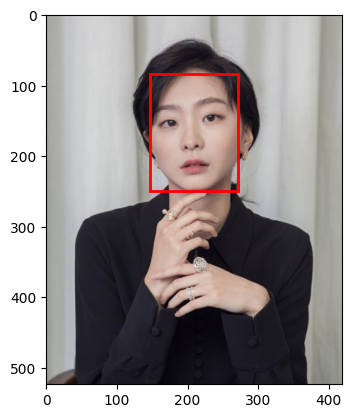

In [37]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from PIL import Image 

im = Image. open (image1) 
fig, ax = plt.subplots() 

# 이미지 표시
ax.imshow(im) 

# 얼굴 주위에 사각형 그리기
face_coord = embeddings[ 0 ][ 'facial_area' ] 
rect = patches.Rectangle((face_coord[ 'x' ], face_coord[ 'y' ]), 
                         face_coord[ 'w' ], face_coord[ 'h' ], 
                         linewidth =2 , 
                         edgecolor = 'r' , 
                         facecolor = 'none' ) 

# 패치를 축에 추가
ax.add_patch(rect)

#### 기본 backend(opencv)로 실행했을 때 image4의 결과 man, fear, white
#### retinaface로 변경한 뒤 실행했을 때 image4의 결과 wonam, neutral, asian

In [43]:
# image4 = '/opt/ml/project/celeb_dataset/test/Suzy/Image_3.jpg'

DeepFace.analyze(img_path = image4, 
                 detector_backend = backends[4],
                 actions = ["age", "gender", "emotion", "race"])


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]   


[{'age': 29,
  'region': {'x': 274, 'y': 140, 'w': 225, 'h': 302},
  'gender': {'Woman': 98.13280701637268, 'Man': 1.8672002479434013},
  'dominant_gender': 'Woman',
  'emotion': {'angry': 2.404536125766299e-07,
   'disgust': 4.314006629176381e-16,
   'fear': 0.2564278896898031,
   'happy': 2.2363586351275444,
   'sad': 0.012709255679510534,
   'surprise': 0.4138834308832884,
   'neutral': 97.08061814308167},
  'dominant_emotion': 'neutral',
  'race': {'asian': 100.0,
   'indian': 7.448803795995218e-08,
   'black': 5.891810832752776e-13,
   'white': 7.046970562640809e-07,
   'middle eastern': 1.7380769132963048e-11,
   'latino hispanic': 5.818534987156454e-07},
  'dominant_race': 'asian'}]

#### find() 함수 실행 시 backend만 변경하고 모델은 VGG-Face로 실행했을 때 얼굴을 제대로 찾지 못 함
#### -> find() 함수는 model 성능과도 영향이 있음을 알 수 있음

In [69]:
# image1 = '/opt/ml/project/celeb_dataset/input/Dami/Image_2.jpg'

DeepFace.find(img_path = image1, 
              db_path = "Faces",
              model_name = models[0],  # VGG-Face
              detector_backend = backends[4],
              enforce_detection = False)[0]

There are  9  representations found in  representations_vgg_face.pkl
find function lasts  5.053066253662109  seconds


,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,Faces/Taehee_1.jpg,147,84,124,165,0.254078
1,Faces/Dami_3.jpg,147,84,124,165,0.277748
2,Faces/Taehee_3.jpg,147,84,124,165,0.315344
3,Faces/Kimjiwon_3.jpg,147,84,124,165,0.334763
4,Faces/Dami_1.jpg,147,84,124,165,0.367146


## backend -> retinaface 고정, model 성능 실험
#### models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "ArcFace"]
#### backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe','yolov8']

VGG-Face : Faces/Taehee_1.jpg, Faces/Dami_3.jpg, Faces/Taehee_3.jpg, Faces/Kimjiwon_3.jpg, Faces/Dami_1.jpg

Facenet : Faces/Dami_3.jpg, Faces/Dami_1.jpg, Faces/Taehee_1.jpg

Facenet512 : Faces/Dami_3.jpg, Faces/Dami_1.jpg

OpenFace : Faces/Dami_3.jpg

DeepFace : Faces/Dami_3.jpg

ArcFace : Faces/Dami_3.jpg, Faces/Dami_1.jpg, Faces/Taehee_1.jpg, Faces/Kimjiwon_1.jpg, Faces/Taehee_3.jpg, Faces/Kimjiwon_3.jpg, Faces/Suzy_1.jpg, Faces/Suzy_3.jpg

In [86]:
DeepFace.find(img_path = image1, 
              db_path = "Faces",
              model_name = models[2],
              detector_backend = backends[4],
              enforce_detection = False)[0]

There are  8  representations found in  representations_facenet512.pkl
find function lasts  4.556535720825195  seconds


,identity,source_x,source_y,source_w,source_h,Facenet512_cosine
0,Faces/Dami_3.jpg,147,84,124,165,0.276478
1,Faces/Dami_1.jpg,147,84,124,165,0.297787
